In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dionysus as d
from Laplacian_Functions_torch import *


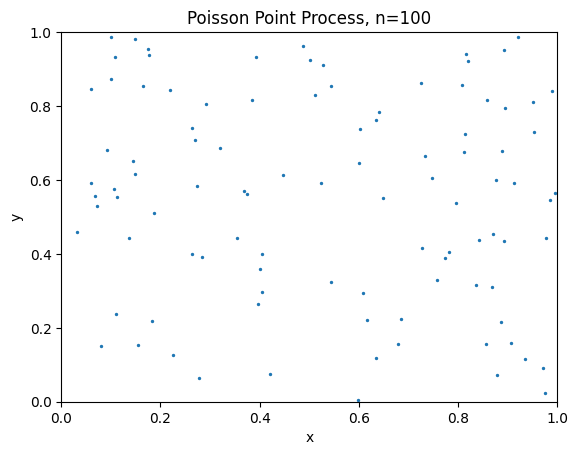

(array([0.37389871, 0.21980437, 0.63390517, 0.83620459, 0.1740452 ,
        0.80766776, 0.10743405, 0.10586391, 0.93413283, 0.40463787,
        0.09127656, 0.98606957, 0.81304542, 0.79584106, 0.51211267,
        0.81281836, 0.07222474, 0.099835  , 0.90723568, 0.27691387,
        0.73242218, 0.18751074, 0.91248344, 0.22489329, 0.2916565 ,
        0.26427131, 0.40400946, 0.85814522, 0.89400714, 0.39761278,
        0.18262038, 0.64019621, 0.89330672, 0.97775936, 0.16550794,
        0.77312606, 0.84208306, 0.72464801, 0.75749924, 0.11145057,
        0.26291508, 0.728208  , 0.67903592, 0.59966436, 0.40035514,
        0.1491392 , 0.03238602, 0.60850079, 0.15439114, 0.85533807,
        0.86989483, 0.61579974, 0.07992474, 0.05910915, 0.63528542,
        0.98898768, 0.8793592 , 0.44668495, 0.38435793, 0.97545185,
        0.52724989, 0.54281145, 0.8920562 , 0.14413206, 0.60296143,
        0.59821176, 0.48670179, 0.17702105, 0.95400525, 0.95103382,
        0.88823567, 0.26993969, 0.42170157, 0.50

In [2]:
def poissonPointProcess(intensity, xMin=0, xMax=1, yMin=0, yMax=1, plot=False, seed=None):
    xDelta=xMax-xMin;yDelta=yMax-yMin #rectangle dimensions
    areaTotal=xDelta*yDelta
    if seed is not None:
        np.random.seed(seed) #set the random seed for reproducibility

    #Simulate a Poisson point process
    numbPoints = np.random.poisson(intensity*areaTotal);#Poisson number of points
    xx = xDelta*np.random.uniform(0,1,numbPoints)+xMin;#x coordinates of Poisson points
    yy = yDelta*np.random.uniform(0,1,numbPoints)+yMin;#y coordinates of Poisson points

    #Plot the points
    if plot:
        plt.figure()
        plt.scatter(xx,yy,s=2)
        plt.xlim(xMin,xMax)
        plt.ylim(yMin,yMax)
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title(f'Poisson Point Process, n={numbPoints}')
        plt.show()
    return xx,yy

poissonPointProcess(100, plot=True)

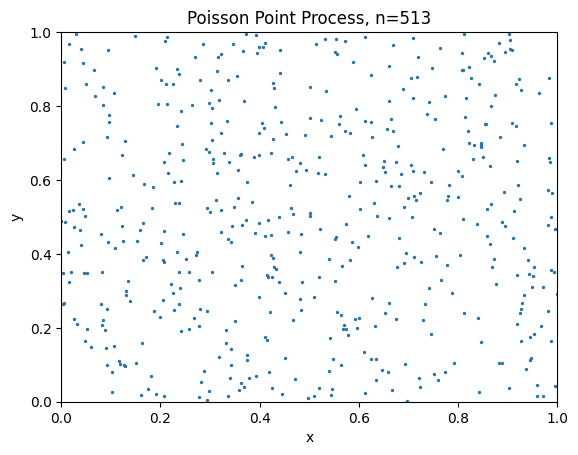

Filtration with 2303 simplices


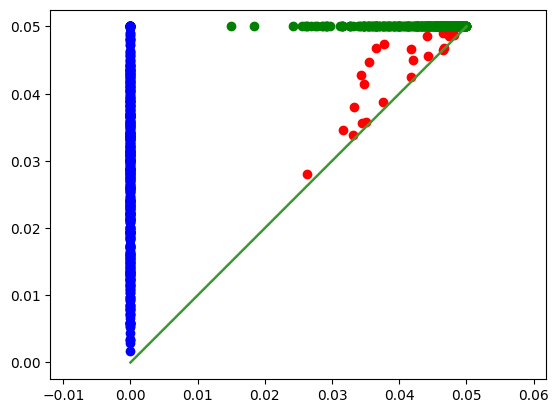

In [3]:
xx, yy = poissonPointProcess(500, seed=123, plot=True)
max_r = 0.05
f = d.fill_rips(np.array([xx, yy]).T, 2, max_r)
print(f)
f.sort()
p = d.cohomology_persistence(f, 47, True)
dgms = d.init_diagrams(p, f)
d.plot.plot_all_diagrams(dgms, limits=[0, max_r, 0, max_r])

In [4]:


def Laplacian_fun(B22_st, B22_stm1, B22_sm1t, B22_sm1tm1, eye):
    return B22_sm1t@B22_stm1-B22_st

eigenvalues, relevant_times, fig, ax = plot_Laplacian_new_eigenvalues(f, lambda x: 1, max_dim =2, plot_types=["Min", "Max", "Sum", "Amount of"], Laplacian_fun= Laplacian_fun, method="less_memory", plot_args_diag={"c": "black", "alpha": 1, "marker": "x"}, plot_type_to_fun={"Amount of": len}, integer_time_steps=False, device="cpu")

Computing boundary matrices:   0%|          | 0/2303 [00:00<?, ?it/s]

Computing boundary matrices done.


  0%|          | 0/1001 [00:00<?, ?it/s]

  0%|          | 0/1001 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [8]:
calc_cross(f, 1, 0.01, 0.04, verb=True)

Computing boundary matrices:   0%|          | 0/2303 [00:00<?, ?it/s]

Computing boundary matrices done.
Bqplus1:
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 1.]], device='cuda:0')
n_q_t:[513, 633, 311, 0], n_q_s: [513, 36, 0, 0]
B12_st:
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')
B22_st:
tensor([[-1.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0.,  ...,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  ...,  0., -1.,  1.]], device='cuda:0')
B22_stm1:
tensor([[-1.,  0.,  0.,  ...,  0.